In [1]:
#Let's read the dataset
import pandas as pd
df = pd.read_csv("../diabetes.csv")

Today is the 12 Day of our Machile Learning challenge where we will write a code in order to learn Machine Learning every single day.
Today our mission is to perform Exploratory Data Analysis on a new dataset. We have seen in previous days how to plot some findings and correlations
but we did it in different days. Today we will try to od it end to end.

In [2]:
#Let's see the dataset
#We can see that dataset contains only numerical values
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#First let's see how many missing values we have and where
df.isnull().sum()
#Okay we don't have any null values that's good

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#let's see mean, median, mode values of all columns in our dataset
for column in df.columns:
    print(column, "Mean ", df[column].mean(), " Median ", df[column].median(), " Mode ", df[column].mode().iloc[-1], " STD ", df[column].std())

Pregnancies Mean  3.8450520833333335  Median  3.0  Mode  1  STD  3.3695780626988694
Glucose Mean  120.89453125  Median  117.0  Mode  100  STD  31.97261819513622
BloodPressure Mean  69.10546875  Median  72.0  Mode  70  STD  19.355807170644777
SkinThickness Mean  20.536458333333332  Median  23.0  Mode  0  STD  15.952217567727637
Insulin Mean  79.79947916666667  Median  30.5  Mode  0  STD  115.24400235133817
BMI Mean  31.992578124999998  Median  32.0  Mode  32.0  STD  7.884160320375446
DiabetesPedigreeFunction Mean  0.47187630208333325  Median  0.3725  Mode  0.258  STD  0.3313285950127749
Age Mean  33.240885416666664  Median  29.0  Mode  22  STD  11.760231540678685
Outcome Mean  0.3489583333333333  Median  0.0  Mode  0  STD  0.47695137724279896


In [5]:
#also we can see this values using the describe method in pandas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

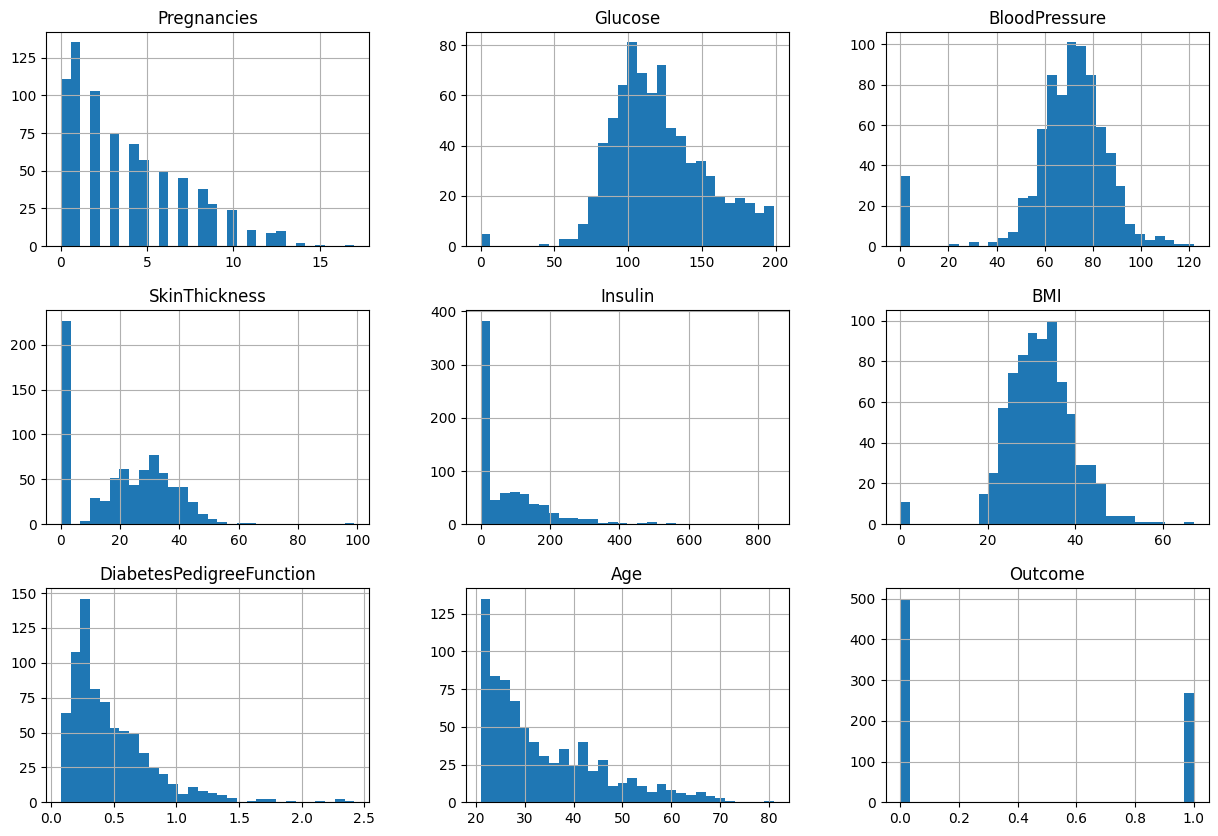

In [6]:
#Let's see histograms
df.hist(bins=30, figsize=(15, 10))
#From the histograms we plotted we can see that the columns such as BloodPressure, Glucose, BMI are somehow normally distributed
#the 

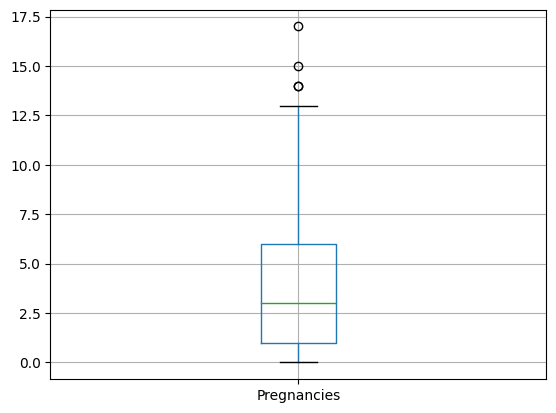

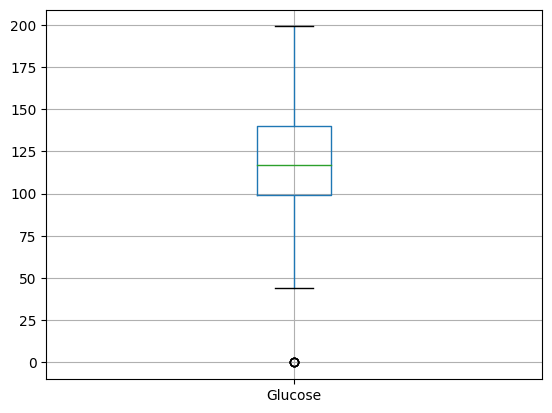

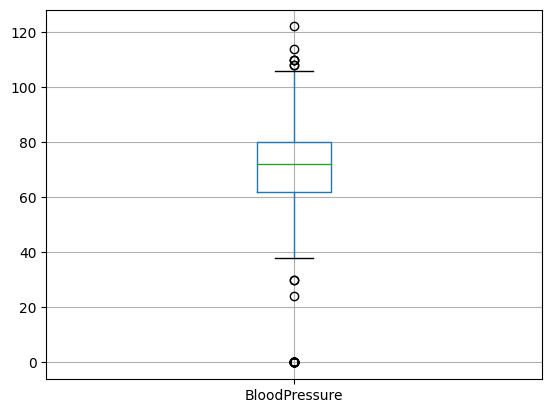

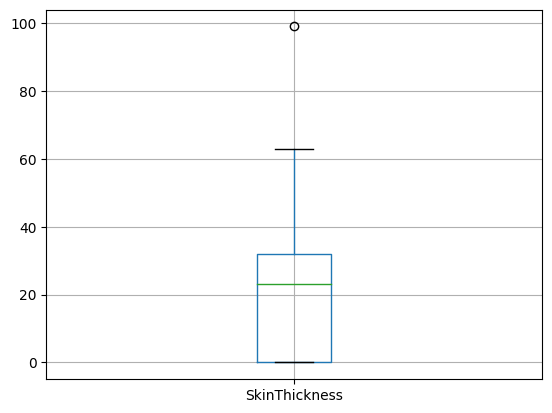

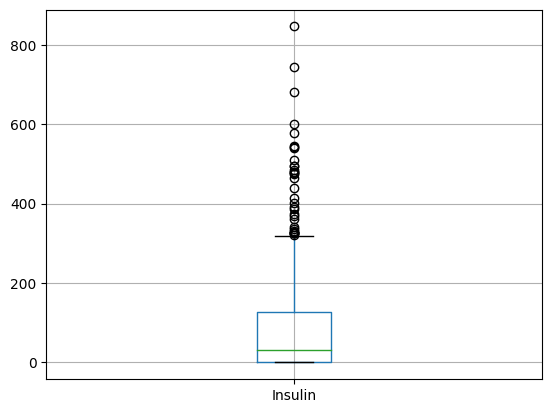

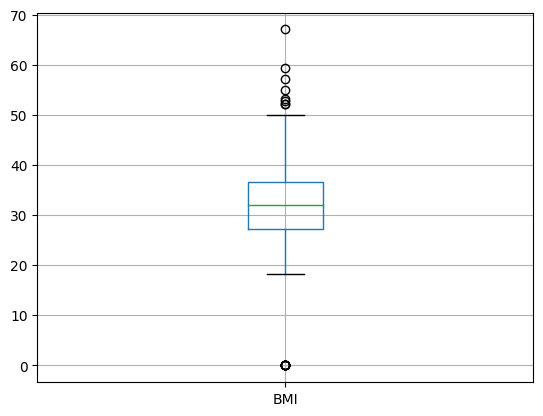

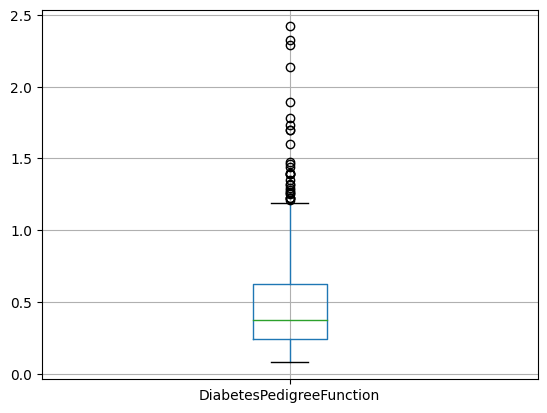

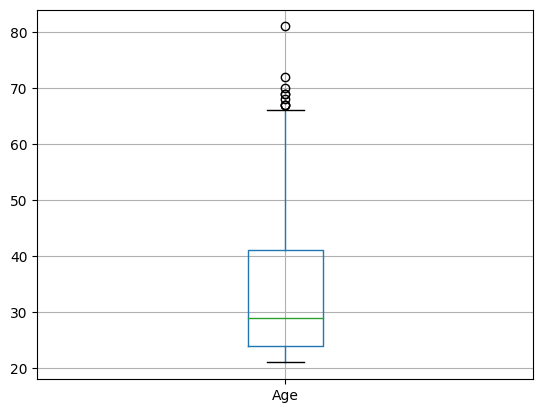

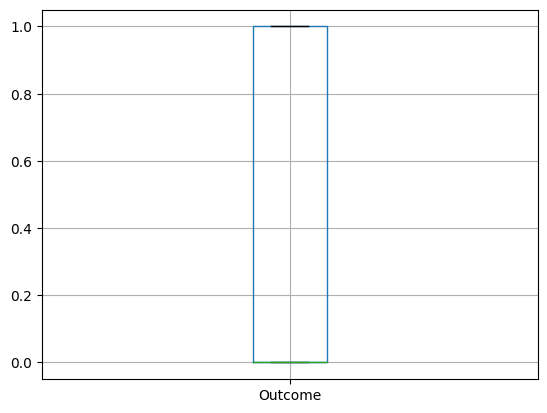

In [7]:
#Here I have plotted box plots in order to see the outliers and now we can see that there are columns which has outliers 
#firther I should get rid of them
import matplotlib.pyplot as plt

for column in df.columns:
    plt.figure()
    df.boxplot([column])

In [8]:
#Now let's see the correlation between features in our dataset
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


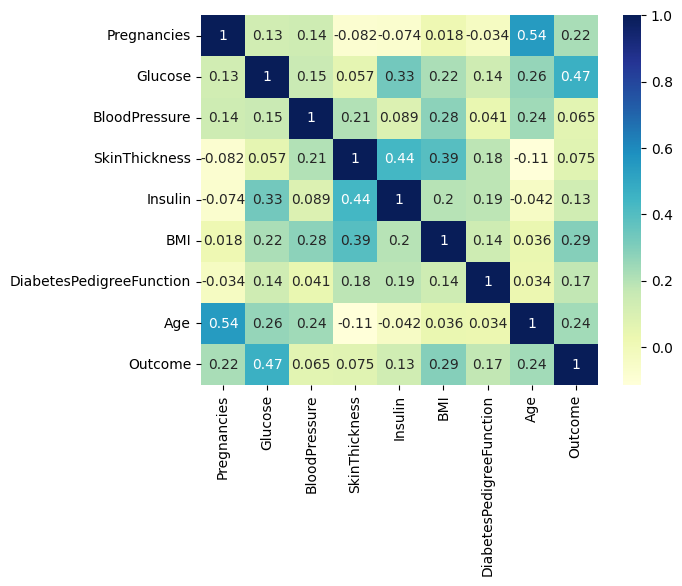

In [12]:
#Here in the heatmap we can see the full correlation as a a plot and we can see which features effects a lot to our predicint value
import seaborn as sns
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

So today in 12 Day of our challenge. Todat we performed end to end dataframe preprocessing
We have plotted heatmaps in order to see the correlation
We plotted histograms to see the info about features in our dataframe. And I think We are ready to make further steps